In [5]:
import os
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm

from src.data.data_reader import DataReader

while str(os.getcwd())[-3:] != 'src':  # Execute from src-directory root
    os.chdir('..')

In [6]:
businesses, reviews, tips, users = DataReader().read_data()

(array([212568., 124052., 120791., 328823., 660881.]),
 array([1., 2., 3., 4., 5., 6.]),
 <BarContainer object of 5 artists>)

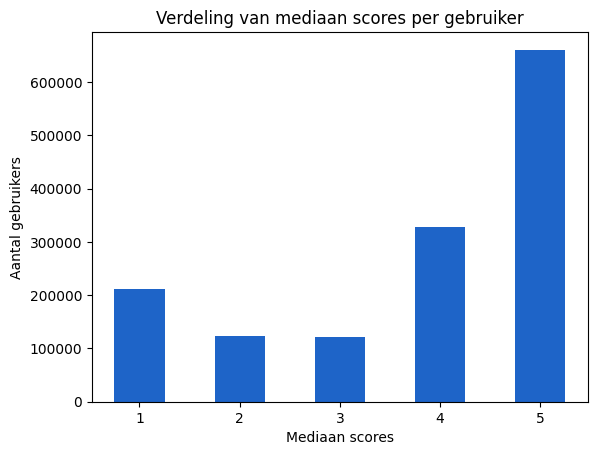

In [7]:
stars_histo = ((reviews.groupby(["user_id"]).median(numeric_only=True)['stars_normalised'] * 4) + 1).round()
plt.title("Verdeling van mediaan scores per gebruiker")
plt.xlabel("Mediaan scores")
plt.ylabel("Aantal gebruikers")
plt.hist(stars_histo, bins=[1, 2, 3, 4, 5, 6], align='left', rwidth=0.5, color='#1E64C8')

(array([839568., 236407., 111733.,  64118.,  41314.,  28105.,  20694.,
         15563.,  12056.,   9630.,   7691.,   6287.,   5247.,   4537.,
          3751.,   3323.,   2809.,   2411.,   2166.,   3551.]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17., 18., 19., 20., 21.]),
 <BarContainer object of 20 artists>)

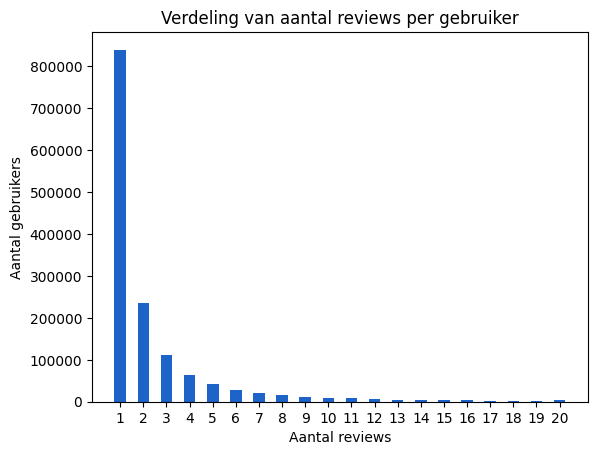

In [8]:
review_count_per_user = reviews.groupby(["user_id"]).count()['stars_normalised']
review_count_per_user.name = 'review_count'

plt.title("Verdeling van aantal reviews per gebruiker")
plt.xlabel("Aantal reviews")
plt.ylabel("Aantal gebruikers")
plt.xticks(np.arange(1, 21, 1.0))
plt.hist(review_count_per_user, align='left', rwidth=0.5, bins=20, range=(1, 21), color='#1E64C8')


(array([ 567659.,  404838.,  543605., 1131544., 2083385.]),
 array([1., 2., 3., 4., 5., 6.]),
 <BarContainer object of 5 artists>)

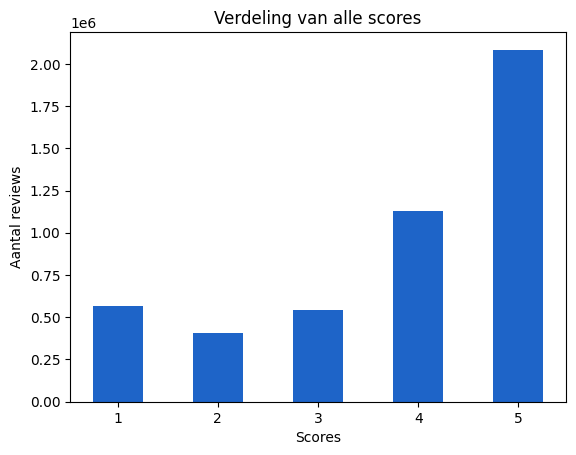

In [9]:
stars_histo = ((reviews['stars_normalised'] * 4) + 1).round()
plt.title("Verdeling van alle scores")
plt.xlabel("Scores")
plt.ylabel("Aantal reviews")
plt.hist(stars_histo, bins=[1, 2, 3, 4, 5, 6], align='left', rwidth=0.5, color='#1E64C8')

(array([992295., 117401.,  87012.,  93956., 156451.]),
 array([0., 1., 2., 3., 4., 5.]),
 <BarContainer object of 5 artists>)

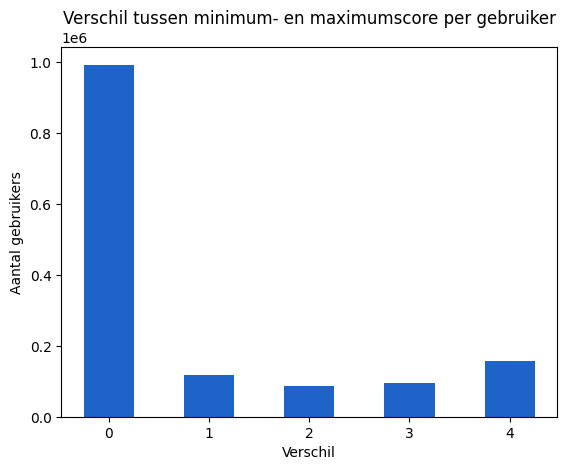

In [10]:
data_min = reviews.groupby(['user_id'])['stars_normalised'].min() * 4 + 1
data_max = reviews.groupby(['user_id'])['stars_normalised'].max() * 4 + 1

data_diff = data_max - data_min
plt.title("Verschil tussen minimum- en maximumscore per gebruiker")
plt.xlabel("Verschil")
plt.ylabel("Aantal gebruikers")
plt.hist(data_diff, bins=[0, 1, 2, 3, 4, 5], align='left', rwidth=0.5, color='#1E64C8')

(array([ 9556., 22708., 32695., 42968., 87362.]),
 array([0., 1., 2., 3., 4., 5.]),
 <BarContainer object of 5 artists>)

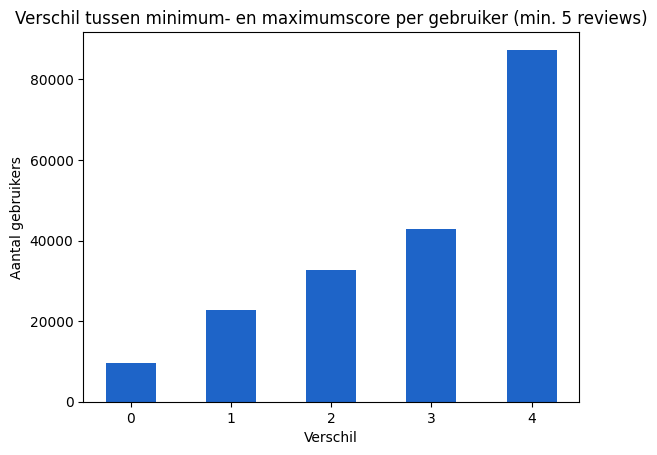

In [11]:
data_min = reviews.groupby(['user_id'])['stars_normalised'].min() * 4 + 1
data_max = reviews.groupby(['user_id'])['stars_normalised'].max() * 4 + 1

data_diff = (data_max - data_min)
data_diff.name = "stars_difference"
reviews_per_user_with_count = pd.concat([data_diff, review_count_per_user], axis=1)
reviews_per_user_with_count = reviews_per_user_with_count[reviews_per_user_with_count['review_count'] >= 5]

plt.title("Verschil tussen minimum- en maximumscore per gebruiker (min. 5 reviews)")
plt.xlabel("Verschil")
plt.ylabel("Aantal gebruikers")
plt.hist(reviews_per_user_with_count['stars_difference'], bins=[0, 1, 2, 3, 4, 5], align='left', rwidth=0.5, color='#1E64C8')

(array([18437., 37875., 49027., 56935., 33015.]),
 array([0., 1., 2., 3., 4., 5.]),
 <BarContainer object of 5 artists>)

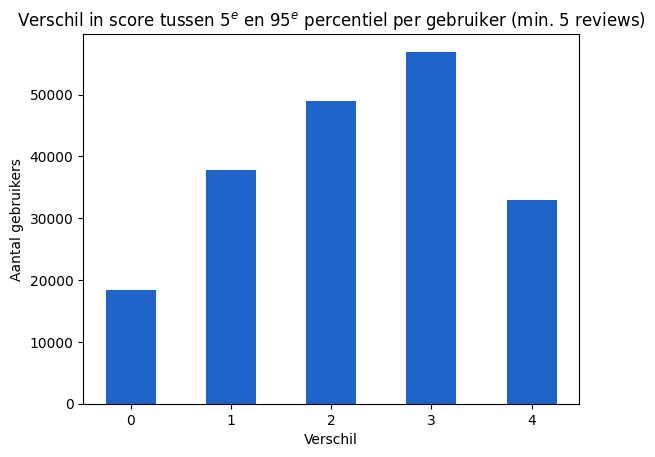

In [12]:
def get_difference_quantile(user_stars):
    return user_stars.quantile(0.95) - user_stars.quantile(0.05)


trans_reviews = reviews.copy(deep = True)
trans_reviews['stars_normalised'] = trans_reviews['stars_normalised'] * 4 + 1
trans_reviews = trans_reviews.join(review_count_per_user, on='user_id')
trans_reviews = trans_reviews[trans_reviews['review_count'] >= 5]
data_diff = trans_reviews.groupby(['user_id'])['stars_normalised'].agg(get_difference_quantile)

plt.title(r"Verschil in score tussen $5^e$ en $95^e$ percentiel per gebruiker (min. 5 reviews)")
plt.xlabel("Verschil")
plt.ylabel("Aantal gebruikers")
plt.hist(data_diff, bins=[0, 1, 2, 3, 4, 5], align='left', rwidth=0.5, color='#1E64C8')

(array([8176., 5683., 4158., 3346., 2706., 2303., 1930., 1678., 1507.,
        1275., 1164., 1043., 1014.,  833.,  846.,  708.,  694.,  650.,
         585.,  510.,  498.,  461.,  473.,  435.,  367.,  371.,  326.,
         349.,  327.,  357.]),
 array([  5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.,  50.,  55.,
         60.,  65.,  70.,  75.,  80.,  85.,  90.,  95., 100., 105., 110.,
        115., 120., 125., 130., 135., 140., 145., 150., 155.]),
 <BarContainer object of 30 artists>)

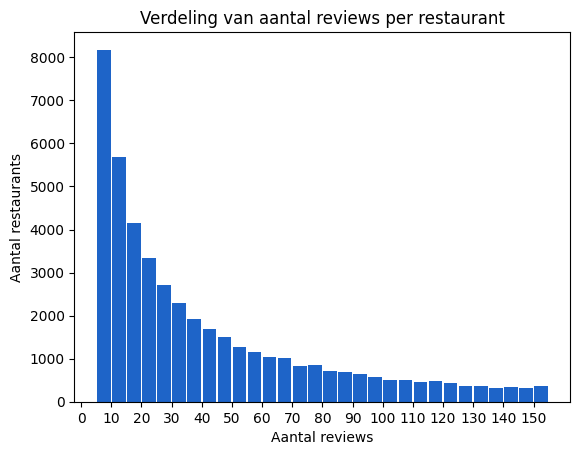

In [13]:
review_count_per_restaurant = reviews.groupby(["business_id"]).count()['stars_normalised']
review_count_per_restaurant.name = 'review_count'

plt.title("Verdeling van aantal reviews per restaurant")
plt.xlabel("Aantal reviews")
plt.ylabel("Aantal restaurants")
amount = 150
base = 5
plt.xticks(np.arange(0, 155, 10))
plt.hist(review_count_per_restaurant, rwidth=0.9, bins=30, range=(base, base + amount), color='#1E64C8')

(array([ 4212.,  5056.,  6647., 21165., 15453.]),
 array([1., 2., 3., 4., 5., 6.]),
 <BarContainer object of 5 artists>)

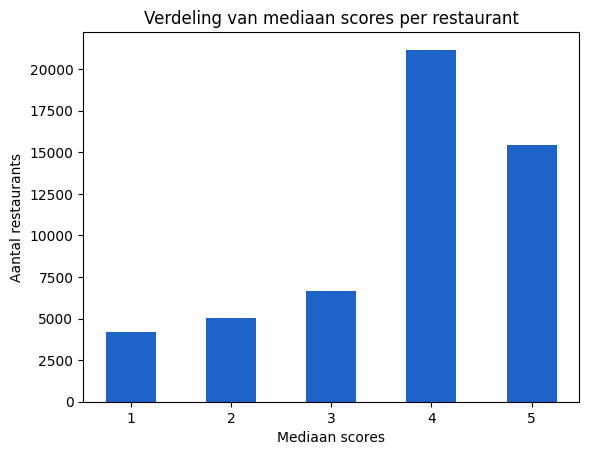

In [14]:
stars_histo = ((reviews.groupby(["business_id"]).median(numeric_only=True)['stars_normalised'] * 4) + 1).round()
plt.title("Verdeling van mediaan scores per restaurant")
plt.xlabel("Mediaan scores")
plt.ylabel("Aantal restaurants")
plt.hist(stars_histo, bins=[1, 2, 3, 4, 5, 6], align='left', rwidth=0.5, color='#1E64C8')

(array([  467.,  1431.,  2262.,  4410., 43963.]),
 array([0., 1., 2., 3., 4., 5.]),
 <BarContainer object of 5 artists>)

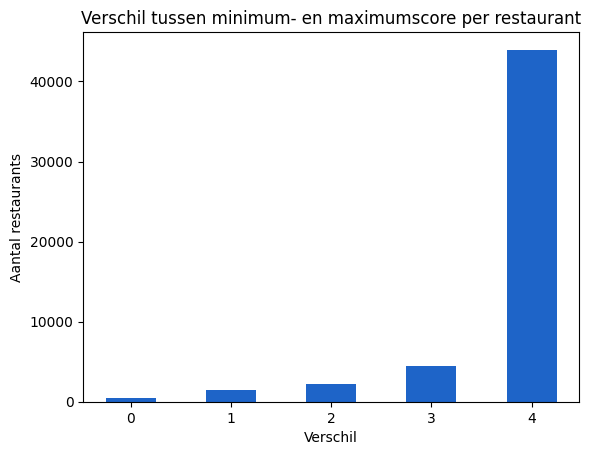

In [15]:
data_min = reviews.groupby(['business_id'])['stars_normalised'].min() * 4 + 1
data_max = reviews.groupby(['business_id'])['stars_normalised'].max() * 4 + 1

data_diff = (data_max - data_min)
data_diff.name = "stars_difference"

plt.title("Verschil tussen minimum- en maximumscore per restaurant")
plt.xlabel("Verschil")
plt.ylabel("Aantal restaurants")
plt.hist(data_diff, bins=[0, 1, 2, 3, 4, 5], align='left', rwidth=0.5, color='#1E64C8')

(array([ 1136.,  3244.,  6223., 13140., 28790.]),
 array([0., 1., 2., 3., 4., 5.]),
 <BarContainer object of 5 artists>)

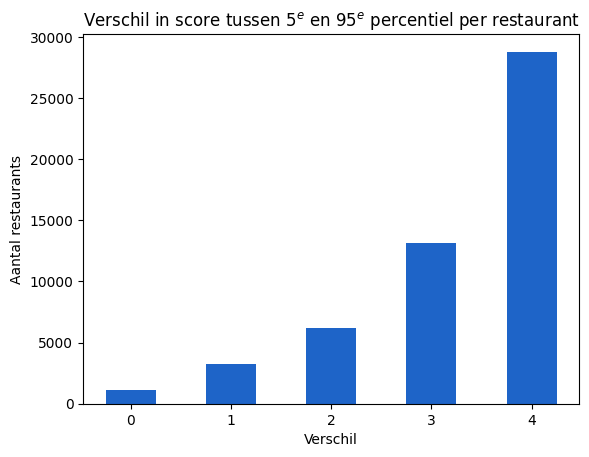

In [16]:
def get_difference_quantile(restaurant_stars):
    return restaurant_stars.quantile(0.95) - restaurant_stars.quantile(0.05)


trans_reviews = reviews.copy(deep = True)
trans_reviews['stars_normalised'] = trans_reviews['stars_normalised'] * 4 + 1
data_diff = trans_reviews.groupby(['business_id'])['stars_normalised'].agg(get_difference_quantile)

plt.title(r"Verschil in score tussen $5^e$ en $95^e$ percentiel per restaurant")
plt.xlabel("Verschil")
plt.ylabel("Aantal restaurants")
plt.hist(data_diff, bins=[0, 1, 2, 3, 4, 5], align='left', rwidth=0.5, color='#1E64C8')

Een restaurant bevat gemiddeld 4.255363295452383 categorieën.


(array([  673., 11543.,  9248., 10008.,  8701.,  5527.,  3189.,  1747.,
          914.,   482.,   267.,   110.,    60.,    48.]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15.]),
 <BarContainer object of 14 artists>)

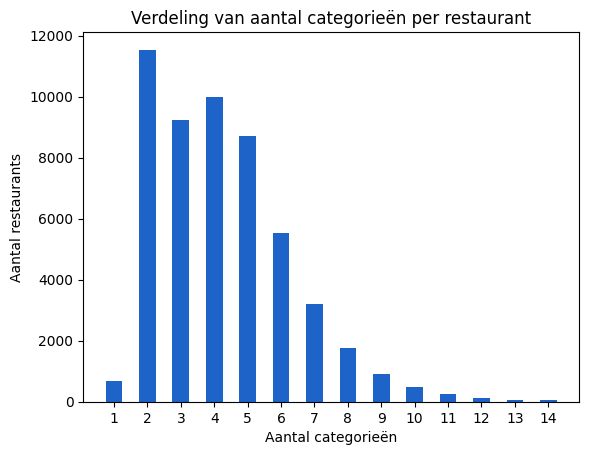

In [32]:
category_col_names = [col_name for col_name in businesses.columns if col_name.startswith("category")]
businesses_categories = businesses[category_col_names]
amount_of_categories = businesses_categories.sum(axis=1)

print(f"Een restaurant bevat gemiddeld {amount_of_categories.mean()} categorieën.")
plt.title("Verdeling van aantal categorieën per restaurant")
plt.xlabel("Aantal categorieën")
plt.ylabel("Aantal restaurants")
plt.xticks(np.arange(0, 15, 1))
plt.hist(amount_of_categories, bins=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], align='left', rwidth=0.5, color='#1E64C8', range=(1, 15))

Een gebruiker bevat gemiddeld 9.126010549309001 categorieën.


(array([     0.,   5347., 120704., 120437., 169779., 161052., 142091.,
        117842.,  95974.,  74123.,  59412.,  51905.,  42764.,  33779.,
         29341.,  24812.,  21530.,  18310.,  16462.,  13960.,  12696.,
         11148.,   9812.,   8643.,   7700.,   6841.,   6154.,   5474.,
          4917.,   4517.,   4037.,   3709.,   3351.,   3072.,   2687.,
          2368.,   2208.,   2137.,   1934.,   3468.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
        39., 40.]),
 <BarContainer object of 40 artists>)

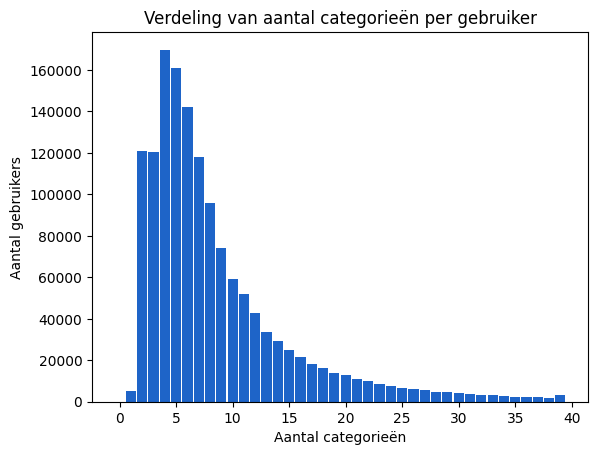

In [42]:
category_col_names = [col_name for col_name in users.columns if col_name.startswith("category")]
users_categories = users[category_col_names].copy(deep=True)
for col_name in category_col_names:
    users_categories[col_name] = users_categories[col_name].transform(lambda x: 1 if x > 0 else 0)
amount_of_categories = users_categories.sum(axis=1)

print(f"Een gebruiker bevat gemiddeld {amount_of_categories.mean()} categorieën.")
plt.title("Verdeling van aantal categorieën per gebruiker")
plt.xlabel("Aantal categorieën")
plt.ylabel("Aantal gebruikers")
plt.xticks(np.arange(0, 41, 5))
plt.hist(amount_of_categories, bins=range(0, 41), align='left', rwidth=0.9, color='#1E64C8', range=(0, 40))

In [61]:
def get_user_ids_with_n_reviews(n: int):
    reviews_per_user_f = reviews.groupby("user_id").count()['useful'].rename("amount_of_reviews")
    reviews_per_user_f = reviews_per_user_f[reviews_per_user_f == n]
    return reviews_per_user_f.index

def get_users_with_n_reviews(n: int):
    users_copy = users.copy(deep=True)
    valid_user_ids = pd.DataFrame(index=get_user_ids_with_n_reviews(n))
    return users_copy.join(valid_user_ids, on='user_id', how='inner')

category_col_names = [col_name for col_name in users.columns if col_name.startswith("category")]

mean_amount_of_categories_per_amount_of_reviews = []

for i in tqdm(range(0, 21)):
    users_n_reviews = get_users_with_n_reviews(i)
    users_categories = users_n_reviews[category_col_names].copy(deep=True)
    for col_name in category_col_names:
        users_categories[col_name] = users_categories[col_name].transform(lambda x: 1 if x > 0 else 0)
    amount_of_categories = users_categories.sum(axis=1)
    mean_amount_of_categories_per_amount_of_reviews.append(amount_of_categories.mean())

  0%|          | 0/21 [00:00<?, ?it/s]

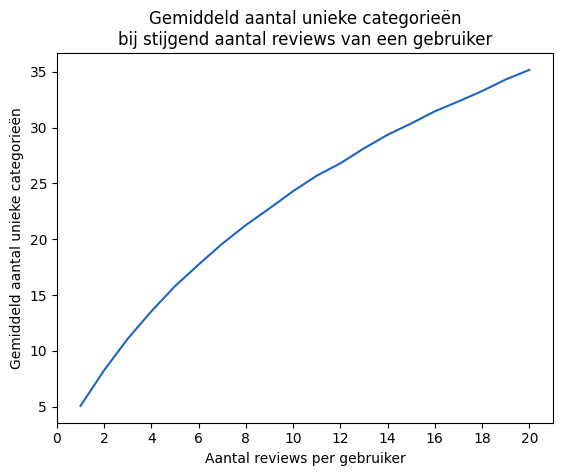

In [82]:
plt.title("Gemiddeld aantal unieke categorieën\nbij stijgend aantal reviews van een gebruiker")

plt.xlim((0, 21))
plt.xticks(range(0, 21, 2))
plt.xlabel("Aantal reviews per gebruiker")
plt.ylabel("Gemiddeld aantal unieke categorieën")

# subtitle: Aantal unieke categorieën geassocieerd met een gebruiker stijgt lineair met het aantal reviews
plt.plot(range(0, 21), mean_amount_of_categories_per_amount_of_reviews, color='#1E64C8')